<a href="https://colab.research.google.com/github/Nato9-7/GRANPROGRAMACION/blob/main/PruebaPaVerSiFuncionaxd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd                  # Manipulación de datos (DataFrames)
import numpy as np                   # Operaciones matemáticas
import matplotlib.pyplot as plt      # Gráficos básicos (histogramas, scatter plots)
import seaborn as sns                # Gráficos avanzados (boxplots, heatmaps)
from scipy import stats              # Cálculos estadísticos (media, moda, correlación)
from scipy.stats import norm         # Distribución normal (probabilidad)
from sklearn.linear_model import LinearRegression  # Regresión lineal
from scipy.stats import pearsonr                   # Correlación de Pearson
from scipy.stats import f_oneway      # ANOVA unidireccional
import statsmodels.api as sm          # ANOVA con más detalle (opcional)
from statsmodels.formula.api import ols  # Modelos lineales (para ANOVA)

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
pokemon = pd.read_csv(name, sep=",")

Saving pokemon_dataset.zip to pokemon_dataset.zip


In [ ]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


1. Estadística Descriptiva (10 pts)
Dado el dataset de Pokémon:

a) Calcula e interpreta las medidas de tendencia central (media, mediana, moda) para la variable Ataque.

b) Genera un histograma de la variable HP (Puntos de Salud) y descríbelo (forma, sesgo, outliers).

c) ¿Qué tipo de gráfico usarías para visualizar la relación entre Ataque y Defensa? Genera el gráfico y comenta si hay correlación visual.

In [ ]:
pokemon['Attack'].mean()

np.float64(79.00125)

In [ ]:
pokemon['Attack'].median()

75.0

In [ ]:
pokemon['Attack'].mode()

,Attack
0,100


A) Se puede observar el promedio de ataque de un pokemon es de 79, mientras que la el valor de la mediana es de 75. Por ultimo el ataque que más se repite entre los pokemones es de 100.

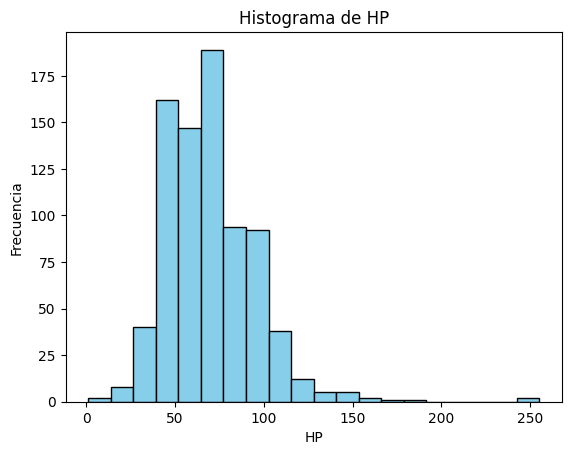

In [ ]:
plt.hist(pokemon['HP'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('HP')
plt.ylabel('Frecuencia')
plt.title('Histograma de HP')
plt.show()

B) Se puede observar una distribución sesgada a la derecha (ya que la cola larga se concentra hacia 150-250hp ). Lo que nos da a entender que la vida que posee un pokemon ronda mayoritariamente entre 40 a 80 aproximadamente.

Por otro lado, se observan outliner en los rangos de 150 a 250, por lo que entendemos que existen pokemones que poseen una alta cantidad de hp, pero son pocos comparados con el promedio.

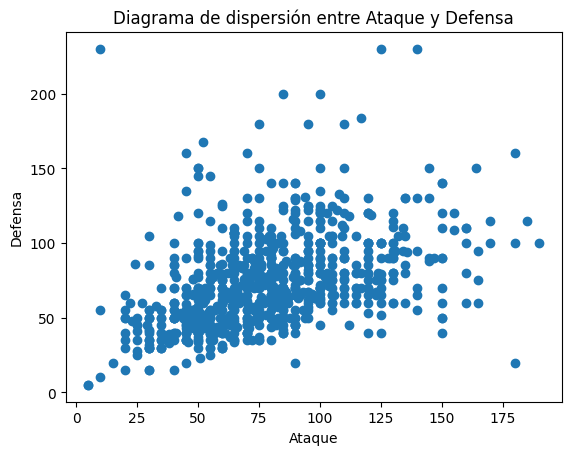

In [ ]:
plt.scatter(pokemon['Attack'], pokemon['Defense'])
plt.xlabel('Ataque')
plt.ylabel('Defensa')
plt.title('Diagrama de dispersión entre Ataque y Defensa')
plt.show()

C) El mejor gráfico para representar la relación que poseen el ataque y la defensa es un diagrama de dispersión, ya que este diagrama nos dira si existe realmente una correlación entre estos dos datos.

*Interpretación*
Se observa que a medida que aumenta el ataque, también lo hace la defensa, esto se da en la mayoria de los pokemones, aunque también existen outliners dentro del gráfico, lo que da a entender que existen pokemones con rasgos inusuales como una alta defensa pero un pobre ataque, saliendose de lo común.

Medidas de Dispersión (10 pts)

a) Calcula el rango, varianza y desviación estándar de la variable Velocidad. ¿Qué nos dice esto sobre la diversidad de velocidades en Pokémon?

b) Genera un boxplot para la variable Defensa por Tipo Primario (ej: Agua, Fuego, etc.). Identifica si hay tipos con outliers claros (ej: Pokémon defensivamente extremos).

In [ ]:
# Rango
velocidad_range = pokemon['Speed'].max() - pokemon['Speed'].min()

# Varianza
velocidad_var = np.var(pokemon['Speed'])

# Desviación estándar
velocidad_std = np.std(pokemon['Speed'])

print(f"Rango: {velocidad_range}")
print(f"Varianza: {velocidad_var}")
print(f"Desviación estándar: {velocidad_std}")

Rango: 175
Varianza: 843.4554937500014
Desviación estándar: 29.042305241664295


Los datos proporcionados nos da a entender que en general los pokemones están cerca del promedio, ya que la desviación estandar es menor al promedio.

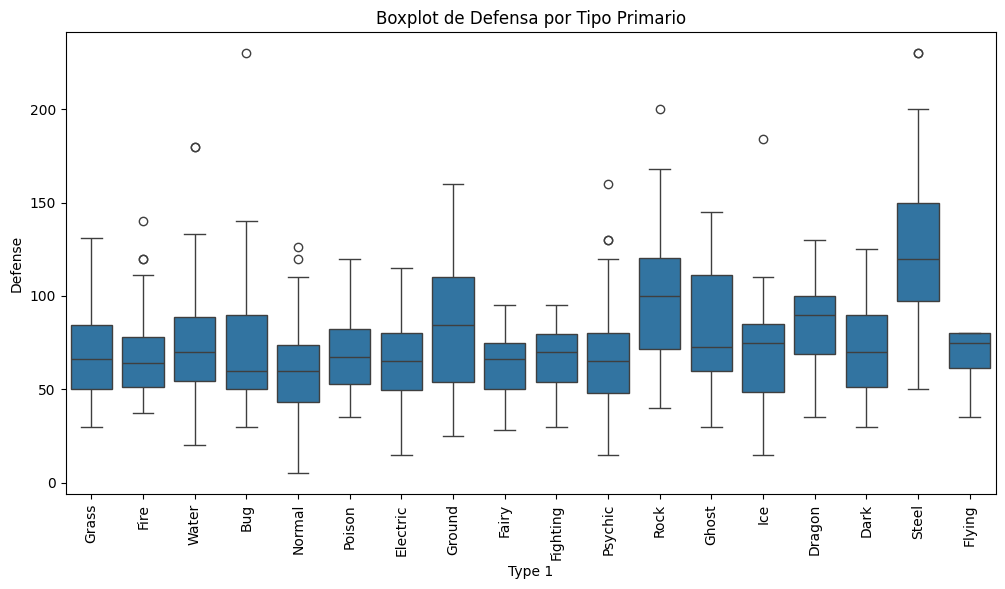

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura si es necesario
sns.boxplot(x='Type 1', y='Defense', data=pokemon)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mejor legibilidad
plt.title('Boxplot de Defensa por Tipo Primario')
plt.show()

En base a lo visto en los boxplot, si podemos observar que existen tipos de pokemon, los cuales tienen unos outliners fuera de lo común comparados con los otros tipos. Por ejemplo, el tipo bug, Ice , Steel; estos 3 son los principales tipos que poseen unos outliners más destacados

3. Probabilidad y Distribuciones (10 pts)

a) Si seleccionamos un Pokémon al azar:

¿Cuál es la probabilidad de que sea de tipo Agua?

¿Y de que sea legendario?

b) Asumiendo que el Ataque sigue una distribución normal:

¿Qué porcentaje de Pokémon tiene un ataque entre 85 y 115 (media = 80, desviación = 15)? Usa la regla empíric

In [ ]:
# Calcular la probabilidad de que un Pokémon sea de tipo Agua
probabilidad_agua = pokemon['Type 1'].value_counts()['Water'] / len(pokemon)

# Imprimir el resultado
print(f"La probabilidad de que un Pokémon sea de tipo Agua es: {probabilidad_agua}")

La probabilidad de que un Pokémon sea de tipo Agua es: 0.14


In [ ]:
probabilidad_legendario = pokemon['Legendary'].value_counts()[True] /len(pokemon)
print(f"La probabilidad de que un Pokémon sea legendario es: {probabilidad_legendario}")

La probabilidad de que un Pokémon sea legendario es: 0.08125


In [ ]:

# Parámetros de la distribución normal
media = 80
desviacion_estandar = 15

# Rango de interés
limite_inferior = 85
limite_superior = 115

# Calcular la probabilidad acumulada para los límites
prob_inferior = norm.cdf(limite_inferior, loc=media, scale=desviacion_estandar)
prob_superior = norm.cdf(limite_superior, loc=media, scale=desviacion_estandar)

# Calcular la probabilidad entre los límites
probabilidad_entre_limites = prob_superior - prob_inferior

# Convertir a porcentaje
porcentaje = probabilidad_entre_limites * 100

# Imprimir el resultado
print(f"El porcentaje de Pokémon con ataque entre {limite_inferior} y {limite_superior} es aproximadamente: {porcentaje:.2f}%")

El porcentaje de Pokémon con ataque entre 85 y 115 es aproximadamente: 35.96%
